In [1]:
from matplotlib.pyplot import *
from matplotlib import pyplot
import math
from scipy.optimize import *

In [2]:
pyplot.rcParams["figure.figsize"] = (20,10)

In [3]:
AcuityNumber = 10

In [4]:
class Section:
    
    def __init__(self,mode):
        self.mode = mode
        self.A_right = [0]*AcuityNumber
        self.A_total = [0]*AcuityNumber
        self.A_percent = [0]*AcuityNumber
        self.delay_dict_list = []
        self.delay_repeat = 0
        self.delay_percent_list = []
        self.delay_dict = {}
        
    def calcul_percent(self):
        for i in range(0,len(self.A_total)):
            if self.A_total[i] != 0:
                self.A_percent[i] = self.A_right[i] / self.A_total[i]
                
    def calcul_delay(self):
        itera = 0
        for delay_dict in self.delay_dict_list:
            self.delay_percent_list.append({})
            for elem in delay_dict:
                self.delay_percent_list[itera][elem] = self.delay_dict_list[itera][elem] / self.delay_repeat
            itera += 1
        

In [5]:
def sigmoid1(x):
    return 1 / (1 + math.exp(-x))

In [6]:
def sigmoid2(x, a, b):
    return 0.875 / (1.0 + np.exp(-a*(x-b))) + 0.125

$$f(x) = \frac {L}{1+e^{-k(x-x_0)}} + Base$$

In [7]:
def sigmoid3(x,a,b,c):
    return c / (1.0+np.exp(-a*(x-b))) +0.125

def cur_fit(y_data):
    popt, pcov = curve_fit(sigmoid2, range(0,len(y_data)), y_data)
    tpl, = plot(range(0,len(y_data)), sigmoid2(range(0,len(y_data)), *popt))
    print(popt)
    return tpl,popt

In [8]:
def cur_fit(y_data, x_data = []):
    if(len(x_data) == 0):
        x_data = range(0,len(y_data))
    popt, pcov = curve_fit(sigmoid3, x_data, y_data)
    tpl, = plot(x_data, sigmoid3(x_data, *popt))
    print(popt)
    return tpl,popt

In [9]:
def percent_cal(k,x0,y):
    loge1dym1 = math.log((1/y)-1)
    return (loge1dym1)/(-k) + x0

In [10]:
path_name = "./data/"
file_name = "AcuityLog_2019_07_19_04_45_23.txt"
head_file_name = "JumpLog__2019_07_19_04_34_39.txt"

In [11]:
file = open(path_name+file_name,"r")
lines = file.readlines()

In [12]:
sections = []
temp_section = None
last_delay = 100
init_delay = 0.0
itera = -1
last_DSS = -1
t_iter = 0
for line in lines:
    strings = line.split()
    if(len(strings) > 3):
        if(strings[1] == "start"):
            if(temp_section != None):
                sections.append(temp_section)
            temp_section = Section(strings[4])
        else:
            try:
                AZ = int(strings[3])
            except:
                AZ = -100
            if(AZ>=0):
                temp_section.A_total[AZ] += 1
                if(last_delay == init_delay and itera == 0):
                    temp_section.delay_repeat += 1
                if(strings[4] == "True"):
                    temp_section.delay_dict[last_DSS] = (last_delay,1)
                    temp_section.A_right[AZ] += 1
                    if(len(temp_section.delay_dict_list) > 0):
                        if(not last_delay in temp_section.delay_dict_list[-1].keys()):
                            temp_section.delay_dict_list[-1][last_delay] = 1
                        else:
                            temp_section.delay_dict_list[-1][last_delay] += 1
                else:
                    temp_section.delay_dict[last_DSS] = (last_delay,0)
            elif(AZ == -2):
                if(float(strings[4]) < last_delay):
                    itera += 1
                    temp_section.delay_dict_list.append({})
                last_delay = float(strings[4])
                last_DSS = strings[1]
                if(temp_section.delay_repeat == 0):
                    init_delay = float(strings[4])
if(temp_section != None):
    sections.append(temp_section)

for section in sections:
    section.calcul_percent()
    
for section in sections:
    section.calcul_delay()
    
print(sections[-1].delay_dict)
print(len(sections[-1].delay_dict))

{'651255': (0.0, 0), '655068': (0.0, 1), '658755': (0.0, 0), '662861': (0.0, 0), '666336': (0.0, 1), '669581': (0.0, 0), '673688': (0.0, 0), '677968': (0.0, 0), '681608': (0.0, 0), '685408': (0.08, 0), '689214': (0.08, 0), '692541': (0.08, 0), '696367': (0.08, 1), '700041': (0.08, 1), '703241': (0.08, 1), '706447': (0.08, 0), '709854': (0.08, 0), '713061': (0.08, 0), '716281': (0.16, 0), '719841': (0.16, 0), '723734': (0.16, 0), '726854': (0.16, 0), '730560': (0.16, 1), '733560': (0.16, 1), '736694': (0.16, 1), '739680': (0.16, 1), '743141': (0.16, 1), '746134': (0.24, 1), '749393': (0.24, 1), '753327': (0.24, 1), '756553': (0.24, 1), '760174': (0.24, 0), '763807': (0.24, 1), '767220': (0.24, 1), '770867': (0.24, 1), '774233': (0.24, 1), '781326': (0.32, 1), '784900': (0.32, 0), '788153': (0.32, 0), '792000': (0.32, 1), '795599': (0.32, 1), '803373': (0.32, 1), '811126': (0.32, 1), '818906': (0.32, 0), '830146': (0.32, 1), '833719': (0.4, 1), '837992': (0.4, 1), '841906': (0.4, 1), '84

In [13]:
head_arr = []
head_turn_arr = []
def read_head():
    file = open(path_name+head_file_name,"r")
    lines = file.readlines()
    for line in lines:
        strings = line.split()
        if(len(strings) > 4):
            if(strings[4] == "head_stop"):
                head_arr.append(int(strings[2]))
            elif(strings[4] == "head_turned"):
                head_turn_arr.append(int(strings[2]))
read_head()         
print(head_arr)
print(len(head_arr))
print(head_turn_arr)
print(len(head_turn_arr))

[651436, 655201, 658948, 663135, 666501, 669908, 673981, 678161, 681734, 685461, 689468, 692761, 696507, 700161, 703488, 706468, 709954, 713141, 716447, 719861, 723787, 726974, 730581, 733687, 736854, 739927, 743213, 746060, 749280, 753447, 756527, 760260, 763827, 767140, 770907, 774160, 781367, 784947, 788019, 792026, 795613, 803306, 811119, 818766, 830166, 833726, 837906, 841692, 845992, 858286, 862212, 866145, 875065, 882152, 885792, 894065, 897711, 901791, 905518, 908931, 916131, 919718, 923905, 932704, 936291, 946071, 950238, 959517, 963284, 967298, 971418, 976104, 980804, 985130, 989297, 993750, 998597, 1004551, 1008650, 1013250, 1017390, 1025677, 1029283, 1033330, 1037076, 1043896, 1048257, 1053777, 1057863, 1066723, 1080162, 1084729, 1088690, 1093302, 1097442, 1102176, 1106449, 1110742, 1115775]
99
[651241, 655062, 658748, 662855, 666328, 669575, 673681, 677961, 681601, 685328, 689134, 692461, 696288, 699961, 703162, 706367, 709774, 712981, 716121, 719682, 723574, 726694, 73040

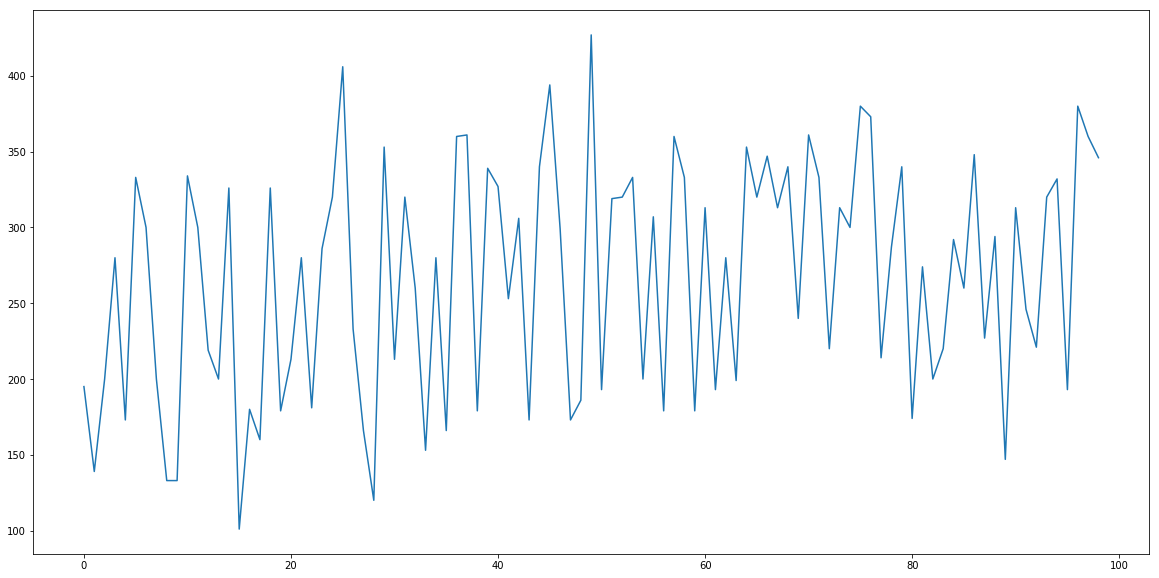

In [14]:
head_TTS = np.subtract(head_arr,head_turn_arr)
plot(range(0,len(head_arr)),head_TTS)

In [15]:
HDrange = 1.0 / (1/960)
#SS, RW, HD
HD_arr = []

def head_delay(section,head_ar):
    for head in head_ar:
        for delay in section.delay_dict.keys():
            if(abs(head - int(delay)) <= HDrange):
                HD_arr.append((int(delay) - head,section.delay_dict[delay][1],
                               section.delay_dict[delay][0]))
                break

                
head_delay(sections[0],head_arr)
#HD_arr.sort(key = lambda tup: tup[0])
print(HD_arr)
print(len(HD_arr))

[(-181, 0, 0.0), (-133, 1, 0.0), (-193, 0, 0.0), (-274, 0, 0.0), (-165, 1, 0.0), (-327, 0, 0.0), (-293, 0, 0.0), (-193, 0, 0.0), (-126, 0, 0.0), (-53, 0, 0.08), (-254, 0, 0.08), (-220, 0, 0.08), (-140, 1, 0.08), (-120, 1, 0.08), (-247, 1, 0.08), (-21, 0, 0.08), (-100, 0, 0.08), (-80, 0, 0.08), (-166, 0, 0.16), (-20, 0, 0.16), (-53, 0, 0.16), (-120, 0, 0.16), (-21, 1, 0.16), (-127, 1, 0.16), (-160, 1, 0.16), (-247, 1, 0.16), (-72, 1, 0.16), (74, 1, 0.24), (113, 1, 0.24), (-120, 1, 0.24), (26, 1, 0.24), (-86, 0, 0.24), (-20, 1, 0.24), (80, 1, 0.24), (-40, 1, 0.24), (73, 1, 0.24), (-41, 1, 0.32), (-47, 0, 0.32), (134, 0, 0.32), (-26, 1, 0.32), (-14, 1, 0.32), (67, 1, 0.32), (7, 1, 0.32), (140, 0, 0.32), (-20, 1, 0.32), (-7, 1, 0.4), (86, 1, 0.4), (214, 1, 0.4), (200, 1, 0.4), (-40, 1, 0.4), (194, 1, 0.4), (67, 1, 0.4), (67, 1, 0.4), (53, 1, 0.4), (273, 1, 0.48), (160, 1, 0.48), (287, 1, 0.48), (107, 1, 0.48), (133, 1, 0.48), (287, 1, 0.48), (154, 1, 0.48), (273, 1, 0.48), (187, 0, 0.48), 

In [16]:
H_inter = 0.08
HS_inter = H_inter * 960
print(HS_inter)
#print(HS_inter)
def cluster(HD_arr):
    index = 0
    cluster_arr = {}
    total_arr = {}
    res_arr = {}
    for HD in HD_arr:
        index = abs(HD[0]) // HS_inter
        index = (index + 1) if (HD[0] >= 0)  else (-index - 1)
        if(not index in total_arr):
            total_arr[index] = 1
        else:
            total_arr[index] += 1
        if(HD[1] == 1):
            if(not index in cluster_arr):
                cluster_arr[index] = 1
            else:
                cluster_arr[index] += 1
        else:
            if(not index in cluster_arr):
                cluster_arr[index] = 0
        for key in cluster_arr:
            res_arr[key] = cluster_arr[key] / total_arr[key]
    return res_arr

HC_dict= cluster(HD_arr)
HC_dict = sorted(HC_dict.items(), key = lambda HCD : HCD[0])
print(HC_dict)

76.8
[(-5.0, 0.0), (-4.0, 0.4), (-3.0, 0.2857142857142857), (-2.0, 0.5), (-1.0, 0.6666666666666666), (1.0, 1.0), (2.0, 0.7142857142857143), (3.0, 0.6923076923076923), (4.0, 0.7777777777777778), (5.0, 0.75), (6.0, 0.9166666666666666), (7.0, 1.0), (8.0, 0.3333333333333333)]


(-5.0, -4.0, -3.0, -2.0, -1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0)
[-0.4  -0.32 -0.24 -0.16 -0.08  0.08  0.16  0.24  0.32  0.4   0.48  0.56
  0.64]
[0.         0.4        0.28571429 0.5        0.66666667 1.
 0.71428571 0.69230769 0.77777778 0.75       0.91666667 1.
 0.33333333]


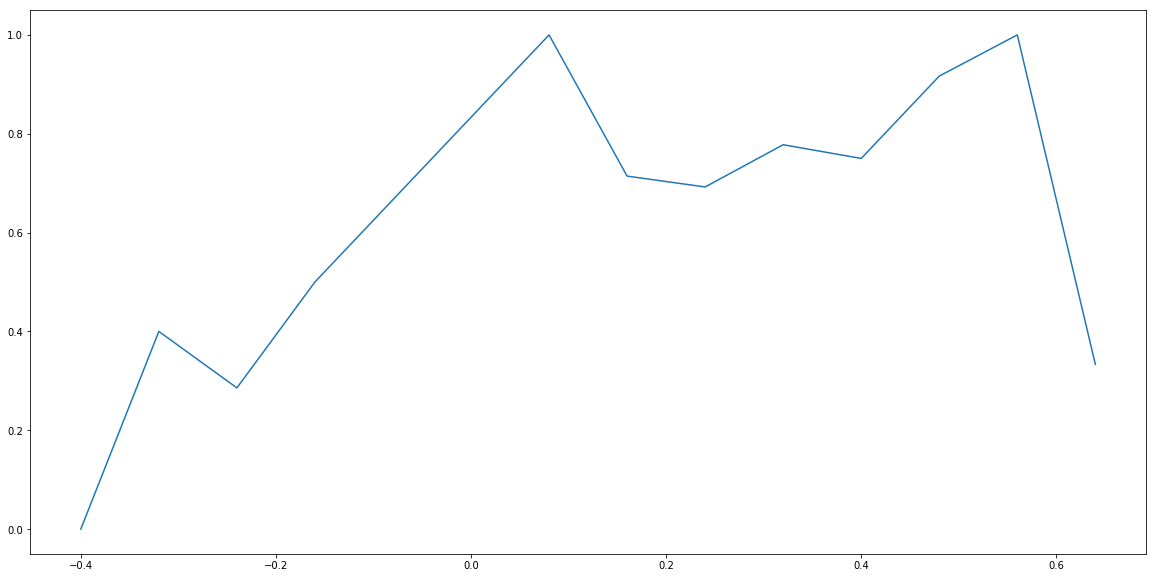

In [17]:
index, res = zip(*HC_dict)
print(index)
index = np.asarray(index)
res = np.asarray(res)
index = index*0.08
print(index)
print(res)

plot(index,res)

[14.60914546 -0.19320016  0.64742674]


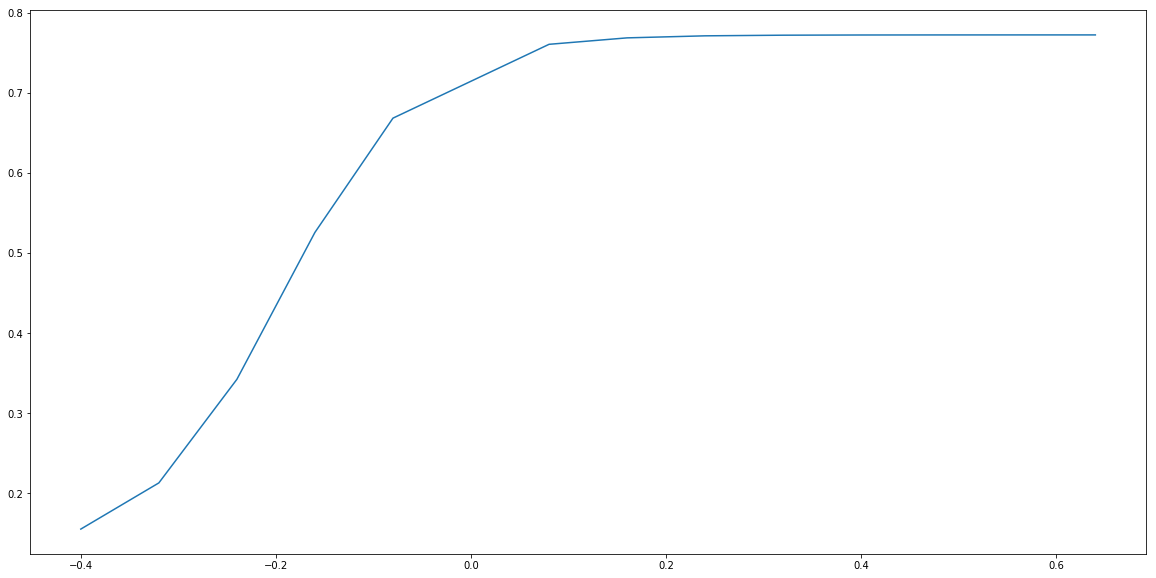

In [18]:
H_tpl,H_popt = cur_fit(res,x_data = index)

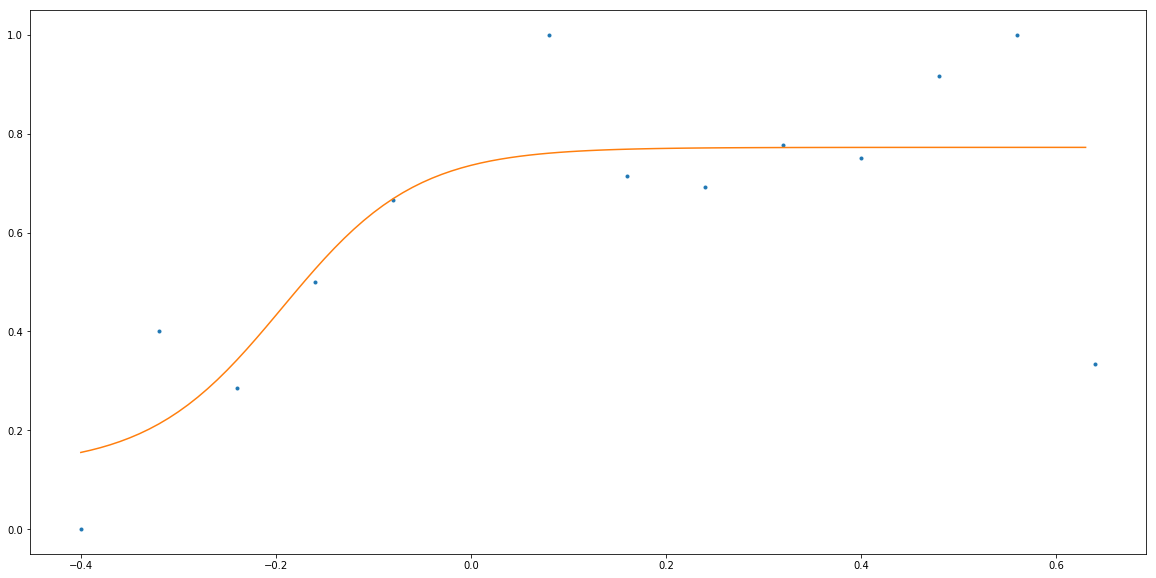

In [32]:
def draw_Compare_Head(cur_popts,x_array,y_array):
    Precise = 0.01
    tpl, = plot(x_array,y_array,".")
    x_min = np.amin(x_array)
    x_max = np.amax(x_array)
    cur_tpl, = plot(np.arange(x_min,x_max,Precise), sigmoid3(np.arange(x_min,x_max,Precise), *cur_popts))
    
draw_Compare_Head(H_popt,index,res)

for(section in sections):
    

In [20]:
def plot_acuity():
    i = -1
    legends = []
    plines = []
    for section in sections:
        i += 1
        tpl, = plot(range(0,AcuityNumber),sections[i].A_percent)
        plines.append(tpl)
        legends.append(sections[i].mode)
    #legends[-1] = "GazeShft"
    pyplot.legend(legends)
    #plines[0].remove()

In [21]:
for delay in sections[-1].delay_percent_list:
    print(delay.keys(),delay.values())

dict_keys([0.0, 0.08, 0.16, 0.24, 0.32, 0.4, 0.48, 0.56, 0.64, 0.72, 0.8]) dict_values([0.2222222222222222, 0.3333333333333333, 0.5555555555555556, 0.8888888888888888, 0.6666666666666666, 1.0, 0.8888888888888888, 0.5555555555555556, 0.7777777777777778, 0.8888888888888888, 0.7777777777777778])


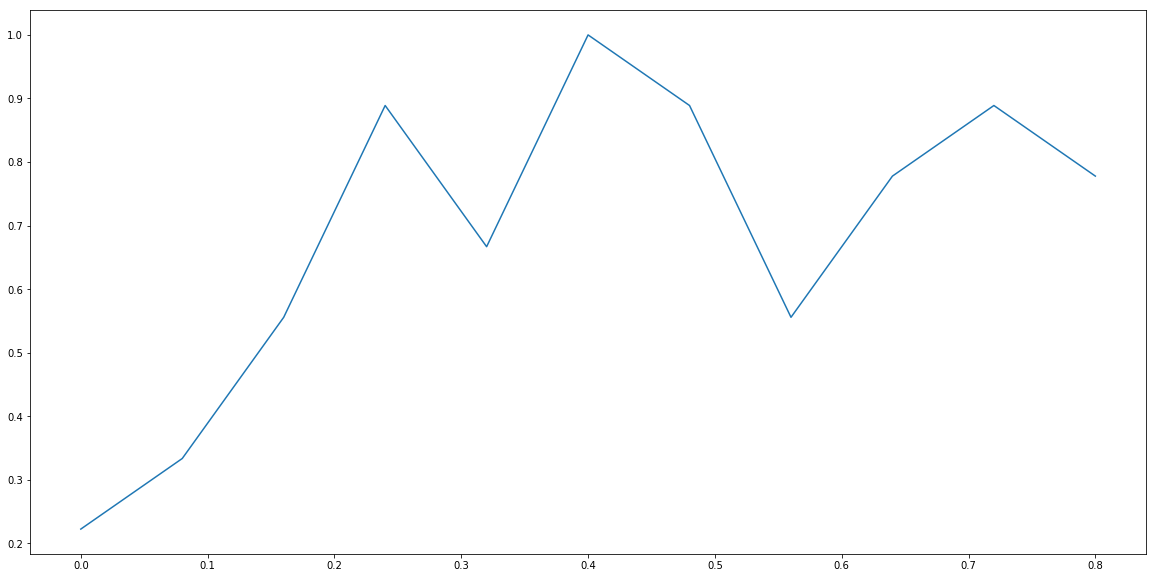

In [22]:
if(len(sections[-1].delay_percent_list) > 0):
    tpl, = plot(sections[-1].delay_percent_list[0].keys(),sections[-1].delay_percent_list[0].values())

[1.69711474 1.48728461 0.68307437]


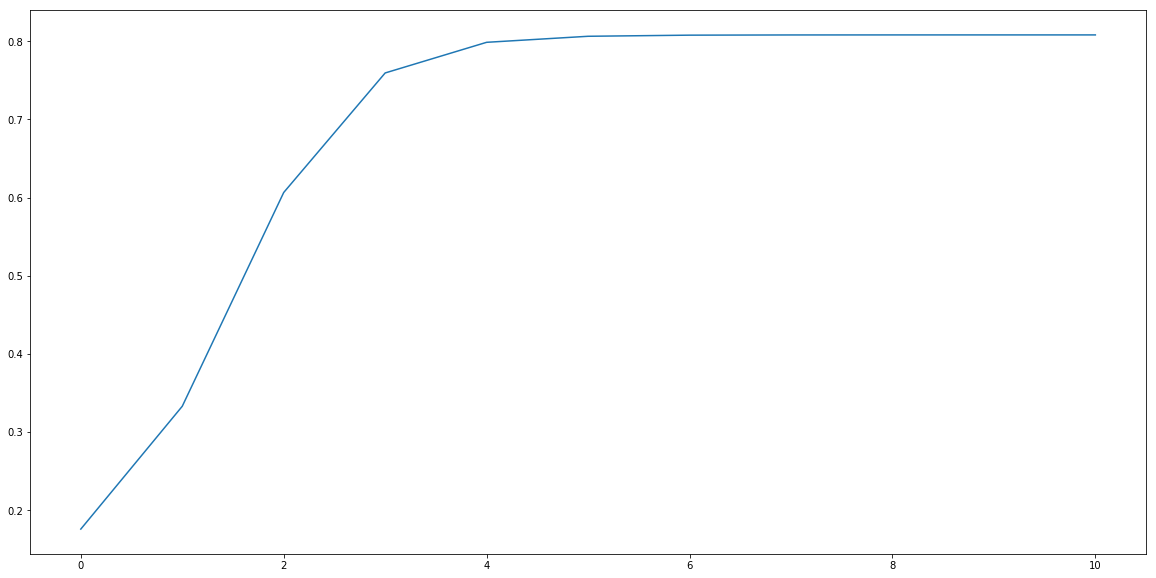

In [23]:
if(len(sections[-1].delay_percent_list) > 0):
    DF_tpl,DF_popt = cur_fit(list(sections[-1].delay_percent_list[0].values()))

In [24]:
start = 60826
end = 206593
frac = 1.0/960.0
def draw_compare_WYData(y_array,cur_popts,index):
    Precise = 0.1
    tpl, = plot(range(0,len(y_array)),y_array,".")
    cur_tpl, = plot(np.arange(0,len(y_array),Precise), sigmoid3(np.arange(0,len(y_array),Precise), *cur_popts))
#    for head_ss in head_arr:
#        if(head_ss >= start and head_ss <= end):
#            time = (head_ss - start)*frac
#            pyplot.axvline(x=time)
    pyplot.savefig("./results/"+file_name[:-4]+"_DR"+index+".png")

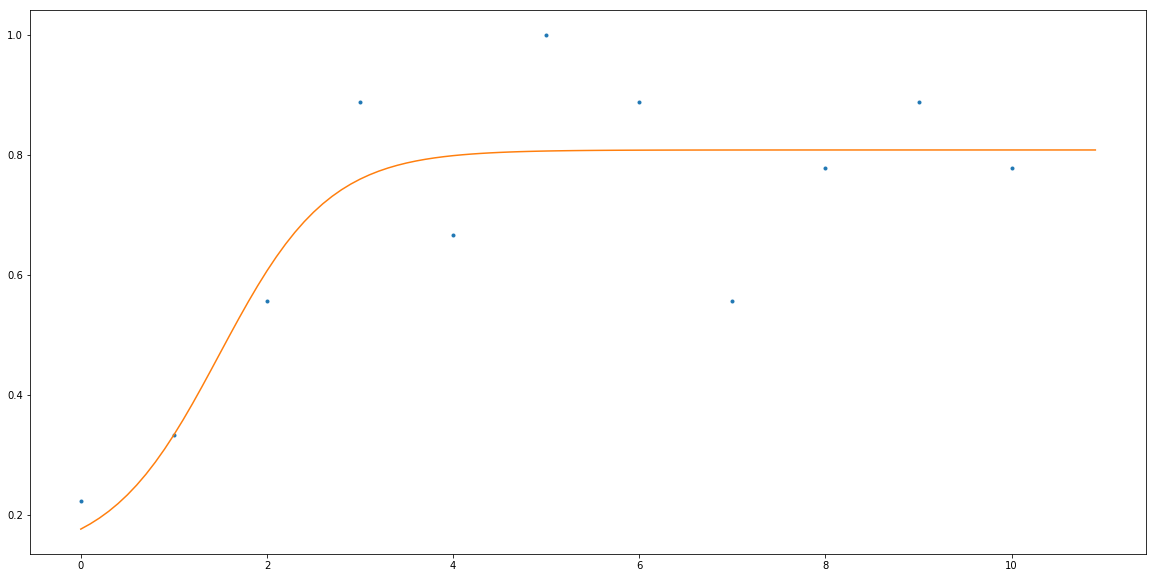

In [25]:
if(len(sections[-1].delay_percent_list) > 0):
    draw_compare_WYData(list(sections[-1].delay_percent_list[0].values()),DF_popt,"2")

In [26]:
def plot_delay():
    i = 0
    legends = []
    plines = []
    for section in sections:
        for delay in section.delay_percent_list:
            tpl, = plot(delay.keys(),delay.values())
            plines.append(tpl)
            legends.append(i)
            i += 1
    pyplot.legend(legends)

DynamicAcuity
[-29.95741751   1.29476742  -0.125     ]


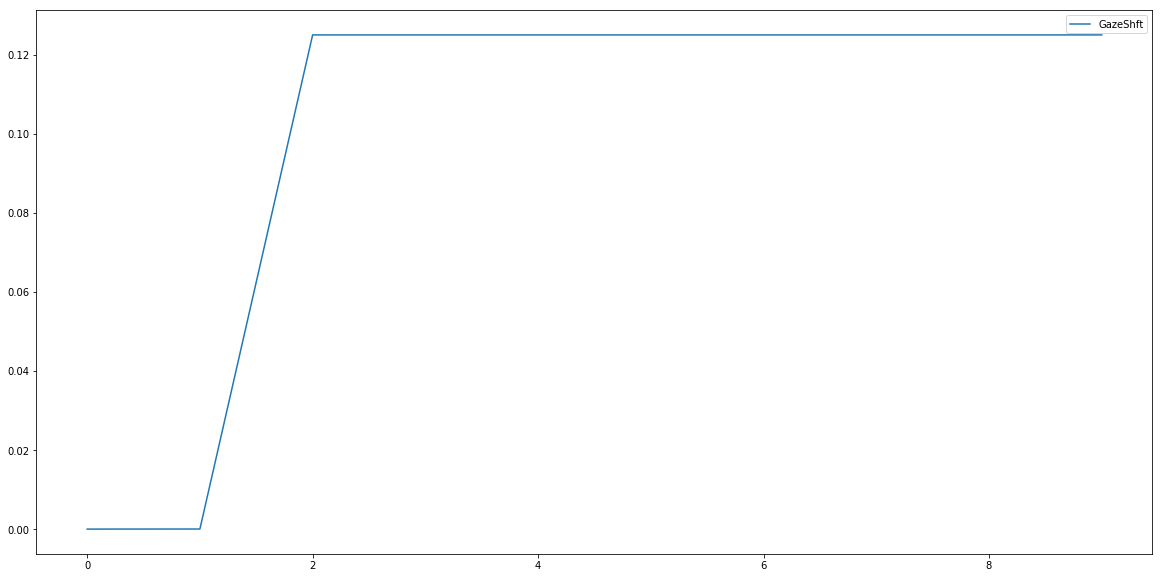

In [27]:
legends2 = []
plines = []
cur_popts = []
for section in sections:
    print(section.mode)
    legends2.append(section.mode)
    tlp,popt = cur_fit(section.A_percent)
    plines.append(tlp)
    cur_popts.append(popt)
legends2[-1] = "GazeShft"
pyplot.legend(legends2)
#plines[0].remove()

In [28]:
Precise = 0.1

def draw_compare(index):
    tpl, = plot(range(0,AcuityNumber),sections[index].A_percent,".")
    cur_tpl, = plot(np.arange(0,len(sections[index].A_percent),Precise), sigmoid2(np.arange(0,len(sections[index].A_percent),Precise), *cur_popts[index]))
    pyplot.legend([sections[index].mode])

In [29]:
def draw_compare(index):
    tpl, = plot(range(0,AcuityNumber),sections[index].A_percent,".")
    cur_tpl, = plot(np.arange(0,len(sections[index].A_percent),Precise), sigmoid3(np.arange(0,len(sections[index].A_percent),Precise), *cur_popts[index]))
    pyplot.legend([sections[index].mode])
    pyplot.savefig("./results/"+file_name[:-4]+"_AR"+str(index)+".png")

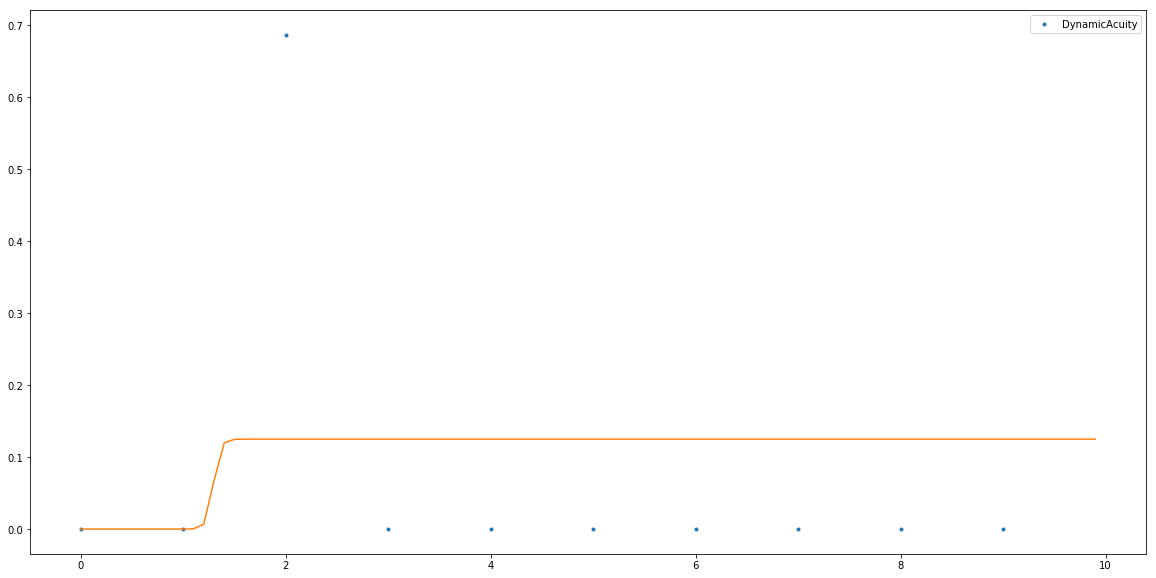

In [30]:
draw_compare(0)

In [31]:
draw_compare(1)

IndexError: list index out of range

In [ ]:
draw_compare(2)

In [ ]:
draw_compare(3)

In [ ]:
y = 0.8
print(percent_cal(1.27684543, 0.88405065 ,y))
print(percent_cal(2.44631207, 0.69156386 ,y))
print(percent_cal(3.20700723, 1.17558442 ,y))
print(percent_cal(0.75669271, 1.70771435 ,y))